In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import quandl
import numpy as np
#import seaborn as sns
#sns.set()
#from sklearn.datasets.samples_generator import make_blobs
from math import sqrt

In [2]:
data_frame = pd.read_csv("one_year_data.csv")
data_frame = data_frame.iloc[:, 1:490]

In [3]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = data_frame.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = data_frame.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
X = np.where(np.isnan(data), 0, data)

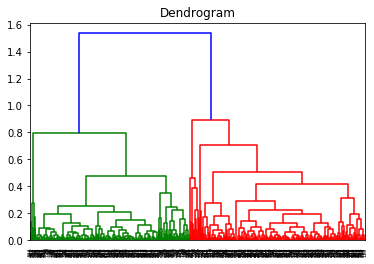

In [4]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.show()

Text(0.5, 1.0, 'Agglomerative clustering for Stock Data')

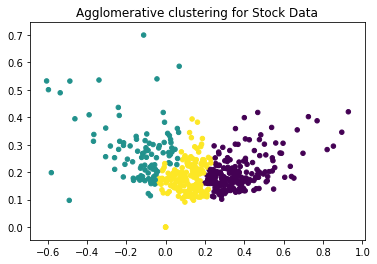

In [5]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=hc.labels_, s=20, cmap='viridis');
plt.title("Agglomerative clustering for Stock Data")